In [1]:
import os, sys
import torch
import gc
from matplotlib import pyplot as plt

gc.collect()
if torch.cuda.is_available():
    torch.cuda.empty_cache()        
    torch.cuda.ipc_collect()


current_dir = os.path.abspath(os.getcwd())

targets = [os.path.join(current_dir, 'src')]

for path in targets:
    if path not in sys.path:
        sys.path.append(path)


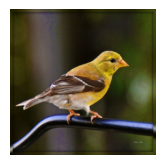

In [2]:
from PIL import Image

image_path = "samples/goldfinch.JPEG" 

img=Image.open(image_path)
img=img.resize((224,224))  

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.axis('off')
plt.show()

In [3]:
%run src/models 

me = ModelEnv('resnet50')

inp = me.get_image(image_path)
logits = me.model(inp).cpu()

topidx = int(torch.argmax(logits))
probs = torch.softmax(logits, dim=1)

print("label, prob:", topidx, probs[0,topidx].tolist())

C:\Users\zivhd\anaconda3\envs\salt\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\zivhd\anaconda3\envs\salt\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\zivhd\anaconda3\envs\salt\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


label, prob: 11 0.9667990803718567


In [4]:
%run src/sloc
sal = SLOC_explain(me, inp, topidx)

tuning probablilties
generating explanation. pprob={pprob}
setting initial
## lr=0.1; c_completeness=0; c_tv=0.1; c_smoothness=0; c_positive=0, c_magnitude=0.01; avg_kernel_size=(5, 5); c_norm=False; c_activation=False; c_model=0; c_opt=Adam;
### {'epochs': 501, 'lr': 0.1, 'score': tensor(145506.9219, device='cuda:0'), 'c_mask_completeness': 1.0, 'c_smoothness': 0, 'c_completeness': 0, 'c_selfness': 0, 'c_magnitude': 0.01, 'c_positive': 0, 'c_tv': 0.1, 'avg_kernel_size': (5, 5), 'c_model': 0, 'c_activation': False, 'c_norm': False, 'renorm': False, 'select_from': None, 'select_freq': 15, 'select_del': 1.0}
Epoch 1/501 Loss=1.7687888145446777; ES=150442.75; comp_loss=1.7249504327774048; exp_loss=0; conv_loss=0; tv_loss=0.14839008450508118; model_loss=0;magnitude_loss=2.899930238723755
Epoch 101/501 Loss=1.0182428359985352; ES=195897.59375; comp_loss=0.9722154140472412; exp_loss=0; conv_loss=0; tv_loss=0.050686463713645935; model_loss=0;magnitude_loss=4.095880508422852
Epoch 201/501 Loss

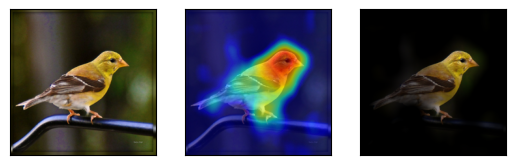

In [6]:
%run src/visutils
showsal(sal, img, alpha=0.6)